In [1]:
import pandas as pd
import os
from textblob import TextBlob
import re
from nltk.stem import WordNetLemmatizer


ModuleNotFoundError: No module named 'textblob'

In [2]:
# Function to read all CSV files in a folder and combine them into a single DataFrame
def combine_csv_files(folder_path):
    df_list = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            file_path = os.path.join(folder_path, file_name)
            df = pd.read_csv(file_path)
            df_list.append(df)
    combined_df = pd.concat(df_list, ignore_index=True)
    return combined_df

df = combine_csv_files('../data/reviews_without_stopwords')
# Drop rows with NaN values in 'reviewContent' column
df = df.dropna(subset=['reviewContent'])

# Get the number of rows using the shape attribute
num_rows = df.shape[0]



print("Number of rows in the DataFrame:", num_rows)

Number of rows in the DataFrame: 438099


In [3]:
chunk_size = len(df) // 10  # Splitting into 10 equal parts

# Create the directory if it doesn't exist
output_dir = "../data/reviews_splitted"
os.makedirs(output_dir, exist_ok=True)

# Split the DataFrame into chunks and save each chunk as a separate CSV file
for i, chunk in enumerate(range(0, len(df), chunk_size)):
    chunk_df = df.iloc[chunk:chunk + chunk_size]
    chunk_df.to_csv(os.path.join(output_dir, f'chunk_{i+1}.csv'), index=False)


In [15]:
def apply_preprocessing_function( function , input_dir , output_dir ):
    os.makedirs(output_dir, exist_ok=True)

    # Iterate through each file in the input directory
    for file_name in os.listdir(input_dir):
        # Check if the file is a CSV file
        if file_name.endswith('.csv'):
            # Read the CSV file into a pandas DataFrame
            file_path = os.path.join(input_dir, file_name)
            df = pd.read_csv(file_path)
        
            # Filter out non-string values in the "reviewContent" column
            df = df[df['reviewContent'].apply(lambda x: isinstance(x, str))]
        
            # Apply lemmatization to the "reviewContent" column
            df['reviewContent'] = df['reviewContent'].apply(function)
        
            # Save the updated DataFrame to a new CSV file
            output_file_path = os.path.join(output_dir, file_name)
            df.to_csv(output_file_path, index=False)
        
            # Print a message indicating that the file has been processed
            print(f"File '{file_name}' has been processed and saved.")

In [5]:
# Function to apply TextBlob correction to a text
def correct_text(text):
    return str(TextBlob(text).correct())

apply_preprocessing_function( correct_text , "../data/reviews_splitted" , "../data/reviews_corrected")

File 'chunk_8.csv' has been corrected and saved.
File 'chunk_9.csv' has been corrected and saved.
File 'chunk_11.csv' has been corrected and saved.
File 'chunk_10.csv' has been corrected and saved.
File 'chunk_1.csv' has been corrected and saved.
File 'chunk_2.csv' has been corrected and saved.
File 'chunk_3.csv' has been corrected and saved.
File 'chunk_7.csv' has been corrected and saved.
File 'chunk_6.csv' has been corrected and saved.
File 'chunk_4.csv' has been corrected and saved.
File 'chunk_5.csv' has been corrected and saved.


In [8]:
def preprocess_text(text):
    # Remove numerical data
    text = re.sub(r'\d+', '', text)
    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Lowercase the text
    text = text.lower()
    return text

apply_preprocessing_function( preprocess_text , "../data/reviews_corrected" , "../data/reviews_preprocessed")

File 'chunk_8.csv' has been corrected and saved.
File 'chunk_9.csv' has been corrected and saved.
File 'chunk_11.csv' has been corrected and saved.
File 'chunk_10.csv' has been corrected and saved.
File 'chunk_1.csv' has been corrected and saved.
File 'chunk_2.csv' has been corrected and saved.
File 'chunk_3.csv' has been corrected and saved.
File 'chunk_7.csv' has been corrected and saved.
File 'chunk_6.csv' has been corrected and saved.
File 'chunk_4.csv' has been corrected and saved.
File 'chunk_5.csv' has been corrected and saved.


In [12]:
def lemmatize_text(text):
    if isinstance(text, str):  # Check if text is a string
        lemmatizer = WordNetLemmatizer()
        return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    else:
        return None  # Return None for non-string values

apply_preprocessing_function( preprocess_text , "../data/reviews_preprocessed" , "../data/reviews_lemmatized")

File 'chunk_8.csv' has been lemmatized and saved.
File 'chunk_9.csv' has been lemmatized and saved.
File 'chunk_11.csv' has been lemmatized and saved.
File 'chunk_10.csv' has been lemmatized and saved.
File 'chunk_1.csv' has been lemmatized and saved.
File 'chunk_2.csv' has been lemmatized and saved.
File 'chunk_3.csv' has been lemmatized and saved.
File 'chunk_7.csv' has been lemmatized and saved.
File 'chunk_6.csv' has been lemmatized and saved.
File 'chunk_4.csv' has been lemmatized and saved.
File 'chunk_5.csv' has been lemmatized and saved.


In [14]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords_and_short_words(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words and len(word) > 2]
    return ' '.join(filtered_words)



apply_preprocessing_function( remove_stopwords_and_short_words , "../data/reviews_lemmatized" , "../data/reviews_without_stopwords")

File 'chunk_8.csv' has been lemmatized and saved.
File 'chunk_9.csv' has been lemmatized and saved.
File 'chunk_11.csv' has been lemmatized and saved.
File 'chunk_10.csv' has been lemmatized and saved.
File 'chunk_1.csv' has been lemmatized and saved.
File 'chunk_2.csv' has been lemmatized and saved.
File 'chunk_3.csv' has been lemmatized and saved.
File 'chunk_7.csv' has been lemmatized and saved.
File 'chunk_6.csv' has been lemmatized and saved.
File 'chunk_4.csv' has been lemmatized and saved.
File 'chunk_5.csv' has been lemmatized and saved.


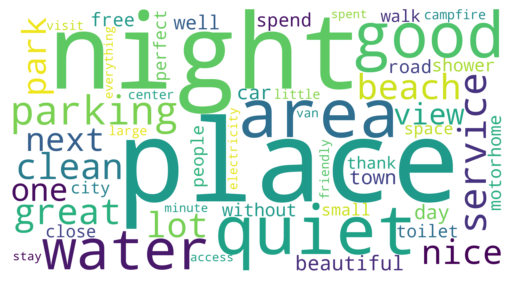

In [2]:
import pandas as pd
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate a word cloud from the 'reviewContent' column
def generate_wordcloud(df):
    text = ' '.join(df['reviewContent'].dropna())
    # Create and generate a word cloud image:
    wordcloud = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080 , max_words=50).generate(text)
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Directory containing the CSV files
folder_path = "../data/reviews_without_stopwords"

# Combine all CSV files into a single DataFrame
combined_df = combine_csv_files(folder_path)

# Generate word cloud from the 'reviewContent' column
generate_wordcloud(combined_df)


In [8]:
import gensim
from gensim import corpora, models
from pprint import pprint

def run_lda(df):
    # Tokenize the documents
    tokenized_docs = [doc.lower().split() for doc in df['reviewContent']]

    # Create a dictionary representation of the documents
    dictionary = corpora.Dictionary(tokenized_docs)

    # Convert tokenized documents into a document-term matrix
    corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

    # Build LDA model
    lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)

    # Print the topics
    pprint(lda_model.print_topics())

In [7]:
run_lda(df)

[(0,
  '0.031*"clean" + 0.025*"shower" + 0.019*"campfire" + 0.017*"friendly" + '
  '0.017*"good" + 0.015*"nice" + 0.014*"toilet" + 0.013*"price" + '
  '0.013*"electricity" + 0.012*"beach"'),
 (1,
  '0.035*"place" + 0.026*"view" + 0.023*"road" + 0.020*"quiet" + '
  '0.018*"beautiful" + 0.018*"access" + 0.017*"night" + 0.016*"great" + '
  '0.016*"spot" + 0.016*"nice"'),
 (2,
  '0.019*"night" + 0.014*"car" + 0.012*"place" + 0.011*"people" + '
  '0.011*"parking" + 0.011*"lot" + 0.010*"park" + 0.009*"one" + 0.009*"day" + '
  '0.008*"morning"'),
 (3,
  '0.106*"water" + 0.063*"area" + 0.044*"service" + 0.039*"free" + '
  '0.020*"thanks" + 0.018*"thank" + 0.018*"emptying" + 0.017*"clean" + '
  '0.015*"gray" + 0.015*"electricity"'),
 (4,
  '0.048*"night" + 0.041*"quiet" + 0.033*"place" + 0.026*"good" + 0.025*"area" '
  '+ 0.019*"next" + 0.018*"parking" + 0.017*"service" + 0.017*"town" + '
  '0.016*"spend"')]


In [4]:
# Split DataFrame based on reviewRate
low_rating_df = df[df['reviewRate'].isin([1, 2, 3])]
high_rating_df = df[df['reviewRate'].isin([4, 5])]

# If you want to reset the index of the new DataFrames
low_rating_df.reset_index(drop=True, inplace=True)
high_rating_df.reset_index(drop=True, inplace=True)

In [5]:
low_rating_df.head()

,placeId,reviewId,reviewRate,reviewUser,reviewDate,reviewContent
0,154745,2551818,2,Pilote8000,14/01/2023,completely flogged flowing everywhere despite ...
1,154745,2539628,3,JamieGross,03/01/2023,stoper overnight stay stopped kiss playground ...
2,154745,2539181,3,Jjl25075,03/01/2023,despite comment noisy parking lot many passage...
3,154745,2534995,3,RafZeFarf,31/12/2022,parking sand next road fine one night vigilant...
4,154745,2534877,3,Sandrachallenger,31/12/2022,large underground car park without service pla...


In [6]:
high_rating_df.head()

,placeId,reviewId,reviewRate,reviewUser,reviewDate,reviewContent
0,154745,2551181,4,cogito,14/01/2023,disposal possible system flogged face escaping...
1,154745,2551126,5,meheskis,14/01/2023,huge parking place full park free surrounded f...
2,154745,2544951,5,NomadasCharlatanes,07/01/2023,thanks capital kind service center minute walk
3,154745,2541823,5,SimoneMarini,05/01/2023,great spot spend night incredible many caper v...
4,154745,2541648,4,Vanessa071988,04/01/2023,good disposal unfortunately currently one fauc...


In [9]:
run_lda(low_rating_df)

[(0,
  '0.062*"night" + 0.024*"place" + 0.023*"parking" + 0.022*"quiet" + '
  '0.021*"lot" + 0.020*"good" + 0.018*"car" + 0.017*"area" + 0.016*"next" + '
  '0.015*"spend"'),
 (1,
  '0.028*"parking" + 0.025*"place" + 0.024*"road" + 0.019*"view" + '
  '0.018*"access" + 0.017*"lot" + 0.014*"park" + 0.014*"car" + 0.013*"small" + '
  '0.012*"space"'),
 (2,
  '0.021*"stay" + 0.020*"place" + 0.012*"overnight" + 0.011*"dont" + '
  '0.010*"police" + 0.010*"park" + 0.010*"leave" + 0.009*"closed" + '
  '0.009*"didnt" + 0.009*"like"'),
 (3,
  '0.095*"water" + 0.042*"area" + 0.024*"service" + 0.017*"empty" + '
  '0.014*"gray" + 0.014*"emptying" + 0.013*"work" + 0.012*"toilet" + '
  '0.012*"free" + 0.012*"fill"'),
 (4,
  '0.022*"campfire" + 0.017*"shower" + 0.015*"clean" + 0.015*"toilet" + '
  '0.014*"night" + 0.012*"electricity" + 0.011*"expensive" + 0.011*"good" + '
  '0.011*"beach" + 0.011*"price"')]


In [10]:
run_lda(high_rating_df)

[(0,
  '0.036*"clean" + 0.029*"good" + 0.027*"friendly" + 0.023*"campfire" + '
  '0.017*"facility" + 0.017*"nice" + 0.016*"staff" + 0.016*"beach" + '
  '0.016*"area" + 0.015*"pool"'),
 (1,
  '0.042*"place" + 0.027*"view" + 0.026*"night" + 0.022*"great" + '
  '0.021*"beautiful" + 0.020*"nice" + 0.019*"quiet" + 0.016*"spot" + '
  '0.009*"one" + 0.009*"really"'),
 (2,
  '0.062*"water" + 0.054*"area" + 0.029*"service" + 0.025*"free" + '
  '0.018*"thanks" + 0.016*"town" + 0.014*"good" + 0.014*"thank" + '
  '0.013*"emptying" + 0.013*"place"'),
 (3,
  '0.034*"toilet" + 0.032*"shower" + 0.020*"water" + 0.015*"electricity" + '
  '0.015*"free" + 0.013*"clean" + 0.013*"station" + 0.011*"also" + '
  '0.011*"minute" + 0.010*"available"'),
 (4,
  '0.044*"night" + 0.034*"quiet" + 0.028*"place" + 0.023*"parking" + '
  '0.021*"good" + 0.016*"next" + 0.015*"area" + 0.015*"park" + 0.014*"spend" + '
  '0.013*"lot"')]


In [ ]:
# Build LSI model
lsi_model = gensim.models.LsiModel(corpus=corpus, id2word=dictionary, num_topics=5)  # Adjust num_topics as needed

# Print the topics
pprint(lsi_model.print_topics())

In [ ]:
df.head()


In [2]:
import osmnx as ox
import matplotlib.pyplot as plt

In [20]:
# Example coordinates (latitude, longitude)
place = "Peniche, Portugal"
tagsx = {'amenity':True, 'landuse':['restaurant']}

gdf = ox.geometries_from_place(place, tags= tagsx)



/var/folders/cj/hd2jxy2d2zv2cplsqh55yfp80000gn/T/ipykernel_7972/4175770191.py:5: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  gdf = ox.geometries_from_place(place, tags= tagsx)


In [18]:
print(gdf)

                            amenity ferry  \
element_type osmid                          
node         451977158   restaurant   NaN   
             451977161      toilets   NaN   
             452000137         cafe   NaN   
             452000152      toilets   NaN   
             452000153    recycling   NaN   
...                             ...   ...   
way          1242949491   recycling   NaN   
             1242951726   recycling   NaN   
relation     1480569        parking   NaN   
             11009259    university   NaN   
             11093016        school   NaN   

                                                                    name  \
element_type osmid                                                         
node         451977158                                         Mar & Sol   
             451977161                                               NaN   
             452000137                               Cafetaria Do Parque   
             452000152            

In [23]:
ox.geocode_to_gdf(["R357794", "N8170768521", "W427818536"], by_osmid=True)


,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((135.55901 35.13689, 135.55907 35.136...",35.321221,34.874916,135.878442,135.559006,230436660,relation,357794,35.021041,135.755607,boundary,administrative,14,0.653138,city,Kyoto,"Kyoto, Kyoto Prefecture, Japan"
1,POINT (13.38882 52.51699),52.521988,52.511988,13.393820,13.383820,129981200,node,8170768521,52.516988,13.388820,railway,station,30,0.000010,railway,Unter den Linden,"Unter den Linden, Friedrichstraße, Dorotheenst..."
2,"POLYGON ((-73.98141 40.76846, -73.98135 40.768...",40.800314,40.764727,-73.949606,-73.981408,311953582,way,427818536,40.782773,-73.965363,leisure,park,24,0.565172,park,Central Park,"Central Park, New York County, New York, Unite..."


In [31]:
# Define the center point (latitude, longitude)
center_point = ( 39.369261, -9.394353)  # Example coordinates (e.g., New York City)

# Define the tags of the features you want to retrieve (optional)
tags = {'amenity': True}  # Retrieve all amenities within the specified distance ['restaurant']

# Define the distance around the center point to search for features (in meters)
distance = 1000  # Example: 1000 meters

# Retrieve features from the point using OSMnx
features = ox.features.features_from_point(center_point, tags=tags, dist=distance)

# Print the retrieved features
features

geometry  \
element_type osmid                                                            
node         5672911721                           POINT (-9.39221 39.36966)   
             6506120485                           POINT (-9.39404 39.36903)   
             7227917644                           POINT (-9.39213 39.36963)   
             7244747643                           POINT (-9.39186 39.36546)   
             7244747644                           POINT (-9.39188 39.36543)   
             7244747645                           POINT (-9.39190 39.36539)   
             7244747646                           POINT (-9.39191 39.36536)   
             7244773914                           POINT (-9.38550 39.36567)   
             7244773915                           POINT (-9.38547 39.36565)   
             7292184785                           POINT (-9.40227 39.36642)   
             8089453107                           POINT (-9.40323 39.36471)   
             9546828709                           POINT (-9.40302 39.36628)   
             11256066229                          POINT (-9.38348 39.36780)   
way          131582991    POLYGON ((-9.38204 39.36299, -9.38199 39.36293...   
             138657967    POLYGON ((-9.38437 39.36840, -9.38315 39.36828...   
             209265722    POLYGON ((-9.40325 39.36659, -9.40330 39.36644...   
             246909569    POLYGON ((-9.40452 39.36484, -9.40171 39.36438...   
             246930154    POLYGON ((-9.38561 39.36026, -9.38535 39.36098...   
             561502385    POLYGON ((-9.38396 39.36992, -9.38412 39.36962...   
             773575930    POLYGON ((-9.40129 39.36613, -9.40094 39.36607...   
             773575935    POLYGON ((-9.40144 39.36566, -9.40200 39.36575...   
             774690065    POLYGON ((-9.39213 39.36963, -9.39209 39.36960...   
             774690142    POLYGON ((-9.38969 39.36945, -9.38965 39.36925...   
             774690192    POLYGON ((-9.38947 39.36599, -9.38964 39.36594...   
             776535887    POLYGON ((-9.38826 39.36343, -9.38853 39.36349...   
             1131529596   POLYGON ((-9.39200 39.36935, -9.39200 39.36961...   
             1211005039   POLYGON ((-9.38239 39.36449, -9.38234 39.36447...   
             1211005040   POLYGON ((-9.38291 39.36323, -9.38244 39.36313...   
relation     11009259     MULTIPOLYGON (((-8.81224 39.73740, -8.81205 39...   

                                   amenity  \
element_type osmid                           
node         5672911721         restaurant   
             6506120485         restaurant   
             7227917644            parking   
             7244747643          recycling   
             7244747644          recycling   
             7244747645          recycling   
             7244747646     waste_disposal   
             7244773914          recycling   
             7244773915     waste_disposal   
             7292184785         restaurant   
             8089453107   charging_station   
             9546828709               cafe   
             11256066229  charging_station   
way          131582991            hospital   
             138657967             parking   
             209265722    place_of_worship   
             246909569          university   
             246930154              school   
             561502385             parking   
             773575930             parking   
             773575935             parking   
             774690065             parking   
             774690142             parking   
             774690192             toilets   
             776535887             parking   
             1131529596            parking   
             1211005039            parking   
             1211005040            parking   
relation     11009259           university   

                                                                    name  \
element_type osmid                                                         
node         5672911721               

In [33]:
features['amenity'].unique()

array(['restaurant', 'parking', 'recycling', 'waste_disposal',
       'charging_station', 'cafe', 'hospital', 'place_of_worship',
       'university', 'school', 'toilets'], dtype=object)

In [46]:
tags = {'natural': ['beach']}  # Retrieve all amenities within the specified distance ['restaurant']

# Define the distance around the center point to search for features (in meters)
distance = 1000  # Example: 1000 meters

# Retrieve features from the point using OSMnx
features = ox.features.features_from_point(center_point, tags=tags, dist=distance)

In [47]:
features

,,nodes,natural,surface,geometry
element_type,osmid,,,,
way,561491220,"[5414071171, 1521394576, 1521394515, 152139469...",beach,sand,"POLYGON ((-9.38540 39.37065, -9.38520 39.37046..."


In [35]:
def get_unique_amenities(latitude, longitude, distance):
    # Define tags to filter only specific types of features (e.g., amenities)
    tags = {'amenity': True}
    
    try:
        # Retrieve features from the point using OSMnx
        features = ox.features.features_from_point((latitude, longitude), tags=tags, dist=distance)
        
        # Extract unique values of the 'amenity' column from the features
        unique_amenities = features['amenity'].unique() if 'amenity' in features.columns else []
        
        return unique_amenities
    except ox._errors.InsufficientResponseError as e:
        print(f"Error occurred {latitude} , {longitude} : {e}")
        return []

df = pd.read_csv('../data/parkingSpots.csv')

# Define distance around the point to search for features (in meters)
distance = 1000  # Example: 1000 meters

# Apply the function to each row in the DataFrame
df['unique_amenities'] = df.apply(lambda row: get_unique_amenities(row['lat'], row['lng'], distance), axis=1)


Error occurred 37.894901 , -8.75784 : No data elements in server response. Check log and query location/tags.
Error occurred 38.606899 , -7.34667 : No data elements in server response. Check log and query location/tags.
Error occurred 38.714298 , -1.11927 : No data elements in server response. Check log and query location/tags.
Error occurred 40.293999 , -7.4296 : No data elements in server response. Check log and query location/tags.
Error occurred 42.676399 , -0.70118 : No data elements in server response. Check log and query location/tags.
Error occurred 41.382801 , 1.32901 : No data elements in server response. Check log and query location/tags.
Error occurred 37.212917 , -5.96386 : No data elements in server response. Check log and query location/tags.
Error occurred 37.504397 , -2.707142 : No data elements in server response. Check log and query location/tags.
Error occurred 40.432098 , -1.43441 : No data elements in server response. Check log and query location/tags.
Error occur

In [36]:
df['unique_amenities']

0        [fuel, restaurant, drinking_water, shower, caf...
1        [place_of_worship, restaurant, charging_statio...
2        [restaurant, pharmacy, cafe, bar, ice_cream, t...
3        [fuel, toilets, telephone, fast_food, pharmacy...
4        [restaurant, waste_disposal, bench, drinking_w...
                               ...                        
34926    [restaurant, motorcycle_parking, ferry_termina...
34927                 [place_of_worship, parking, toilets]
34928    [restaurant, bench, drinking_water, bicycle_re...
34929         [toilets, waste_basket, parking, restaurant]
34930    [fuel, post_office, waste_basket, bicycle_park...
Name: unique_amenities, Length: 34931, dtype: object

In [53]:
# Filter rows where 'bar' is in the 'unique_amenities' list
bar_rows = df[df['unique_amenities'].apply(lambda x: 'bar' in x)]

# Print the filtered rows
bar_rows.head()

KeyError: 'unique_amenities'

In [50]:
def get_natural_environment(latitude, longitude, distance):

    # Define tags to filter only specific types of features (e.g., amenities)
    tags = {'natural': ['beach','coastline','peninsula','dune','valley','volcano','wood']}  # Retrieve all amenities within the specified distance ['restaurant']
    
    try:
        # Retrieve features from the point using OSMnx
        features = ox.features.features_from_point((latitude, longitude), tags=tags, dist=distance)
        
        # Extract unique values of the 'amenity' column from the features
        natural = features['natural'].unique() if 'natural' in features.columns else []
        
        return natural
    except ox._errors.InsufficientResponseError as e:
        print(f"Error occurred {latitude} , {longitude} : {e}")
        return []

df = pd.read_csv('../data/parkingSpots.csv')

# Define distance around the point to search for features (in meters)
distance = 1000  # Example: 1000 meters

# Apply the function to each row in the DataFrame
df['natural'] = df.apply(lambda row: get_natural_environment(row['lat'], row['lng'], distance), axis=1)


Error occurred 42.453999 , 2.05916 : No data elements in server response. Check log and query location/tags.
Error occurred 42.487099 , 1.94486 : No data elements in server response. Check log and query location/tags.
Error occurred 41.8039 , -6.74627 : No data elements in server response. Check log and query location/tags.
Error occurred 38.889599 , -5.88051 : No data elements in server response. Check log and query location/tags.
Error occurred 42.5271 , 2.02221 : No data elements in server response. Check log and query location/tags.
Error occurred 42.60442 , -5.584698 : No data elements in server response. Check log and query location/tags.
Error occurred 38.2579 , -7.99057 : No data elements in server response. Check log and query location/tags.
Error occurred 41.220699 , -1.79235 : No data elements in server response. Check log and query location/tags.
Error occurred 41.060011 , -7.220807 : No data elements in server response. Check log and query location/tags.
Error occurred 42.

/Users/joaoribeiro/opt/anaconda3/envs/ox/lib/python3.12/site-packages/osmnx/features.py:1047: FutureWarning: <class 'geopandas.array.GeometryArray'>._reduce will require a `keepdims` parameter in the future
  gdf = gdf.dropna(axis="columns", how="all")


Error occurred 37.182389 , -3.615692 : No data elements in server response. Check log and query location/tags.
Error occurred 37.12763 , -8.392444 : No data elements in server response. Check log and query location/tags.
Error occurred 36.864065 , -5.184663 : No data elements in server response. Check log and query location/tags.
Error occurred 36.72518 , -4.274784 : No data elements in server response. Check log and query location/tags.
Error occurred 39.8535 , -8.345541 : No data elements in server response. Check log and query location/tags.
Error occurred 36.972149 , -3.58754 : No data elements in server response. Check log and query location/tags.
Error occurred 38.05024 , -2.96659 : No data elements in server response. Check log and query location/tags.
Error occurred 38.16964 , -1.730913 : No data elements in server response. Check log and query location/tags.
Error occurred 40.973243 , 0.516788 : No data elements in server response. Check log and query location/tags.
Error occu

/Users/joaoribeiro/opt/anaconda3/envs/ox/lib/python3.12/site-packages/osmnx/features.py:1047: FutureWarning: <class 'geopandas.array.GeometryArray'>._reduce will require a `keepdims` parameter in the future
  gdf = gdf.dropna(axis="columns", how="all")


Error occurred 36.60308 , -4.635353 : No data elements in server response. Check log and query location/tags.
Error occurred 39.32668 , -8.61569 : No data elements in server response. Check log and query location/tags.
Error occurred 37.18637 , -4.040058 : No data elements in server response. Check log and query location/tags.
Error occurred 40.342963 , -3.840663 : No data elements in server response. Check log and query location/tags.
Error occurred 42.337325 , -7.196108 : No data elements in server response. Check log and query location/tags.
Error occurred 39.243124 , -0.3160139999999999 : No data elements in server response. Check log and query location/tags.
Error occurred 43.182066 , -8.963857 : No data elements in server response. Check log and query location/tags.
Error occurred 40.465683 , -3.867827 : No data elements in server response. Check log and query location/tags.
Error occurred 43.002026 , -5.267656 : No data elements in server response. Check log and query location/t

/Users/joaoribeiro/opt/anaconda3/envs/ox/lib/python3.12/site-packages/osmnx/features.py:1047: FutureWarning: <class 'geopandas.array.GeometryArray'>._reduce will require a `keepdims` parameter in the future
  gdf = gdf.dropna(axis="columns", how="all")


Error occurred 36.637127 , -4.691989 : No data elements in server response. Check log and query location/tags.
Error occurred 39.74094 , -0.367063 : No data elements in server response. Check log and query location/tags.
Error occurred 37.20413 , -7.696239 : No data elements in server response. Check log and query location/tags.
Error occurred 28.11607 , -15.52108 : No data elements in server response. Check log and query location/tags.
Error occurred 37.907392 , -6.560045 : No data elements in server response. Check log and query location/tags.
Error occurred 37.049026 , -7.806737 : No data elements in server response. Check log and query location/tags.
Error occurred 41.51956 , -8.682157 : No data elements in server response. Check log and query location/tags.
Error occurred 42.106176 , 1.880059 : No data elements in server response. Check log and query location/tags.
Error occurred 38.795452 , -0.610606 : No data elements in server response. Check log and query location/tags.
Error 

In [54]:
df[['natural']].head()

,natural
0,"[beach, coastline, wood, peninsula]"
1,[wood]
2,"[beach, coastline]"
3,"[coastline, wood, beach, peninsula]"
4,"[coastline, beach, peninsula]"


In [55]:
df.to_csv('../data/parkingSpots_natural.csv', index=False) 

In [56]:
df['unique_amenities'] = df.apply(lambda row: get_unique_amenities(row['lat'], row['lng'], distance), axis=1)

Error occurred 37.894901 , -8.75784 : No data elements in server response. Check log and query location/tags.
Error occurred 38.606899 , -7.34667 : No data elements in server response. Check log and query location/tags.
Error occurred 38.714298 , -1.11927 : No data elements in server response. Check log and query location/tags.
Error occurred 40.293999 , -7.4296 : No data elements in server response. Check log and query location/tags.
Error occurred 42.676399 , -0.70118 : No data elements in server response. Check log and query location/tags.
Error occurred 41.382801 , 1.32901 : No data elements in server response. Check log and query location/tags.
Error occurred 37.212917 , -5.96386 : No data elements in server response. Check log and query location/tags.
Error occurred 37.504397 , -2.707142 : No data elements in server response. Check log and query location/tags.
Error occurred 40.432098 , -1.43441 : No data elements in server response. Check log and query location/tags.
Error occur